In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from subprocess import call
import os
import json
import glob
from PIL import Image
import imageio

In [16]:
# Open file and extract data
f = open('./server/log.json', 'r');
contents = f.readlines()
#print(contents[0])

In [17]:
result = {'pic': [], 'bbox': [], 'mask': [], 'class': []}

# Convert the data into json format for easy extraction
json_format=json.loads(contents[0])

# Get bbox and class here
for i in range(len(json_format)):
    result['bbox'].append(json_format[i]['bbox'])
    result['class'].append(json_format[i]['class'])
    img_src = './src/img_vid1/'+json_format[i]['pic'][2:]
    result['pic'].append(imageio.imread(img_src))

result['pic'] = np.array(result['pic']) 
#print(result)


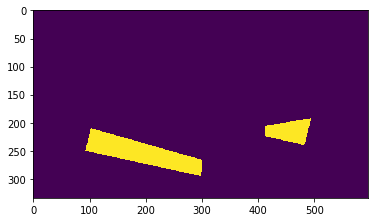

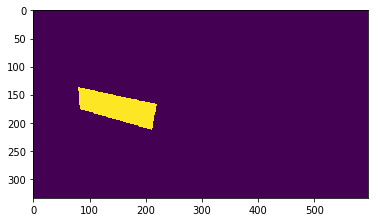

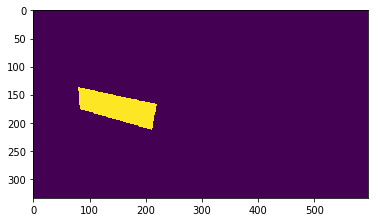

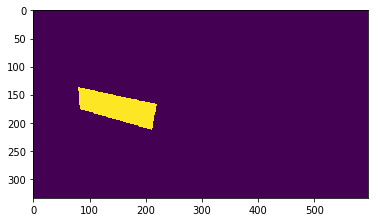

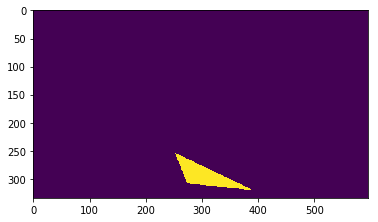

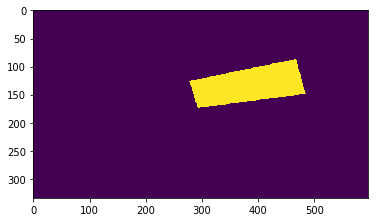

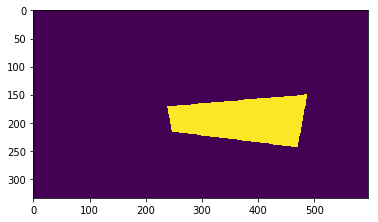

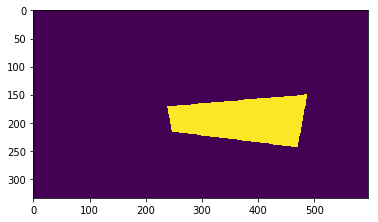

In [18]:
# Convert the mask data into a binary mask
# -Extract points data for each image
for k in range(len(json_format)):
    pts_all = []
    # Extract points data for each mask in each image
    for j in range(len(json_format[k]['mask'])):
        pts = []
        if (len(json_format[k]['mask'][j])!=0):
            for i in range(len(json_format[k]['mask'][j])):
                x = json_format[k]['mask'][j][i]['x']
                y = json_format[k]['mask'][j][i]['y']
                pts.append([x,y])
            pts_all.append(pts)

    # Extract image information
    hgt = result['pic'].shape[1]
    wdt = result['pic'].shape[2]
    mask = np.zeros((hgt,wdt))

    # Account for multiple masks
    for m in range(len(pts_all)):
        # Create the mask using OpenCV
        pts = np.array(pts_all)
        cv2.fillConvexPoly(mask, np.array(pts[m]), 1)
    
    mask = mask.astype(np.bool)
        
    plt.figure()
    plt.imshow(mask)
    result['mask'].append(mask) # 1 Mask for each image


In [20]:
# Result stats
pic_qty = len(result['pic'])
print('images: '+str(pic_qty))
mask_qty = len(result['mask'])
print('masks: '+str(mask_qty))
bbox_qty = len(result['bbox'])
print('bounding boxes: '+str(bbox_qty))
class_qty = len(result['class'])
print('classes: '+str(class_qty))

images: 8
masks: 8
bounding boxes: 8
classes: 8
